# Najboljše knjige iz seznama Best Books Ever

## Projektna naloga
Analizirala bom najbolj najboljše knjige po izboru bralcev iz seznama Best Books Ever na strani Goodreads z uporabo Pandas. Na seznamu bo samo prvih 500 knjig.

Za vsako knjigo bo zajeto:
- naslov,
- avtor,
- ocena,
- število ocen,
- število glasov,
- format,
- števil strani,
- leto,
- jezik in
- žanr


Hipoteze:
- Kateri avtor se največkrat pojavi?
- Največkrat se pojavijo knjige v angleščini
- Največkrat se pojavijo knjige iz žanra "classics"
- Ali število ocen vpliva na oceno?
- Največkrat se pojavijo trdovezane (Hardcover) knjige
- Katero je bilo najbolje ocenjeno leto?
- Boljšo oceno imajo knjige v zbirki kot samostojne knjige
- Kateri žanr ima najboljšo oceno?
- Kateri žanr je največkrat ocenjen?
- Kateri žanr ima najdaljše knjige?

In [25]:
import pandas as pd
pd.options.display.max_rows = 10
%matplotlib inline
import os.path
csv_datoteka = os.path.join("obdelani-podatki", "knjige.csv")
knjige = pd.read_csv(csv_datoteka)

### Razpredelnica s podatki

In [3]:
knjige

,id,naslov,zbirka,id_avtorja,avtor,ocena,stevilo_ocen,glasovi,format,stevilo_strani,leto,jezik,zanr
0,2767052,The Hunger Games,The Hunger Games,153394,Suzanne Collins,4.32,7030124,32406,Hardcover,374,2008,English,Young Adult
1,2,Harry Potter and the Order of the Phoenix,Harry Potter,1077326,J.K. Rowling,4.50,2796588,28363,Paperback,870,2004,English,Fantasy
2,2657,To Kill a Mockingbird,NaN,1825,Harper Lee,4.27,5004737,24711,Paperback,324,2006,English,Classics
3,1885,Pride and Prejudice,NaN,1265,Jane Austen,4.27,3390660,22410,Paperback,279,2000,English,Classics
4,41865,Twilight,The Twilight Saga,941441,Stephenie Meyer,3.62,5469753,15436,ebook,387,2006,English,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,3087,A Room with a View,NaN,86404,E.M. Forster,3.91,161039,303,Paperback,119,2005,English,Classics
496,30289,The Republic,NaN,879,Plato,3.95,184611,296,Paperback,416,2003,English,Philosophy
497,4137,Me Talk Pretty One Day,NaN,2849,David Sedaris,3.99,654871,271,Paperback,272,2001,English,Nonfiction
498,31242,Bleak House,NaN,239579,Charles Dickens,4.00,106047,275,Paperback,1017,2006,English,Classics


### 1. Kateri avtorji se največkrat pojavijo?

In [26]:
najveckrat_avtorji = knjige.groupby('id_avtorja').size().sort_values().to_frame('pojavitve')
najveckrat_avtorji

,pojavitve
id_avtorja,
8719,1
12942,1
13677,1
13778,1
13957,1
...,...
137902,6
150038,7
1077326,9


In [27]:
imena_avtorjev = knjige[['id_avtorja', 'avtor']]
imena_avtorjev

,id_avtorja,avtor
0,153394,Suzanne Collins
1,1077326,J.K. Rowling
2,1825,Harper Lee
3,1265,Jane Austen
4,941441,Stephenie Meyer
...,...,...
495,86404,E.M. Forster
496,879,Plato
497,2849,David Sedaris
498,239579,Charles Dickens


Razpredelnica z id-ji avtorja in njihovimi imeni.

In [28]:
imena_in_pojavitve = pd.merge(najveckrat_avtorji, imena_avtorjev, left_on='id_avtorja', right_on='id_avtorja').drop_duplicates().reset_index(drop=True)
imena_in_pojavitve

,id_avtorja,pojavitve,avtor
0,8719,1,Donna Tartt
1,12942,1,Judy Blume
2,13677,1,Gail Carson Levine
3,13778,1,Bill Watterson
4,13957,1,Scott Westerfeld
...,...,...,...
325,137902,6,Richelle Mead
326,150038,7,Cassandra Clare
327,1077326,9,J.K. Rowling
328,15872,9,Rick Riordan


Največkrat se pojavi Stephen King z 10 knjigami, sledta mu Rick Riordan in J.K.Rowling z 9 knjigami.

### 2. Največ knjig je v angleščini

In [32]:
jezik_knjig = knjige.groupby('jezik').size().sort_values()
jezik_knjig

jezik
French       1
Persian      1
Spanish      1
Arabic       3
English    492
dtype: int64

Skoraj vse knjige so v angleščini, z izjemo šestih: treh v arabščini,ene v francoščini, ene v perzijščini in ene v španščini.

### 3. Največkrat se pojavijo knjige iz žanra "classics"

In [35]:
stevilo_zanra = knjige.groupby('zanr').size().sort_values().to_frame('število')
stevilo_zanra

,število
zanr,
Academic,1
Science,1
Religion,1
Travel,1
History,1
...,...
Historical,21
Young Adult,58
Fantasy,84


Največkrat se pojavijo klasike, sledi jim fikcija, fantazijske in knjige za mladostnike. Še na grafu:

<AxesSubplot:xlabel='zanr'>

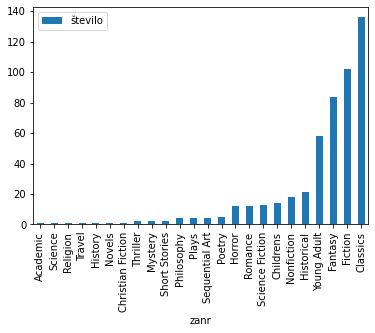

In [36]:
stevilo_zanra.plot.bar()

### 4. Ali število ocen vpliva na oceno?

<AxesSubplot:xlabel='stevilo_ocen', ylabel='ocena'>

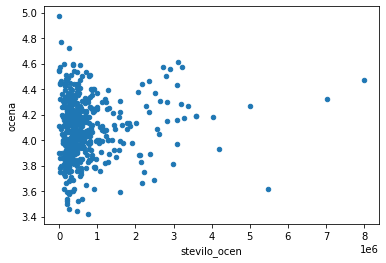

In [37]:
knjige.sort_values('ocena').plot.scatter(x='stevilo_ocen', y='ocena')

Iz grafa se vidi da imajo povprečno knjige z več ocenami večjo oceno, vendar ta razlika ni pretirano velika.

### 5. Največkrat se pojavijo knjige s trdo vezavo (Hardcover)

In [56]:
stevilo_formata = knjige.groupby('format').size().sort_values().to_frame('stevilo')
stevilo_formata

,stevilo
format,
Board book,1
Leather Bound,1
ebook,6
Kindle Edition,26
Mass Market Paperback,48
Hardcover,130
Paperback,288


Zgleda, da se največkrat pojavijo knjige z mehko vezavo, nato pa knjige s trdo vezavo, ki jih je pol manj.

### 6. Katero je bilo najbolje ocenjeno leto?

In [39]:
letne_ocene = knjige.groupby('leto').mean().ocena.to_frame('povprecna_letna_ocena')
letne_ocene

,povprecna_letna_ocena
leto,
650,4.3600
1895,3.9000
1923,4.2100
1942,4.2300
1949,4.1900
...,...
2017,4.1550
2018,4.0775
2019,4.1250


In [40]:
letne_ocene.sort_values('povprecna_letna_ocena')

,povprecna_letna_ocena
leto,
1976,3.62
1957,3.81
1979,3.82
1972,3.83
1991,3.88
...,...
650,4.36
1973,4.37
1964,4.37


Najbolje je bilo ocenjeno leto 2021, najmanj pa leto 1976. Še graf:

<AxesSubplot:xlabel='leto'>

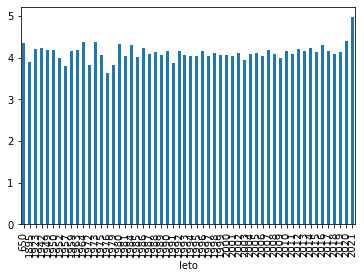

In [42]:
knjige.groupby('leto').mean().ocena.plot.bar()

### 7. Boljšo oceno imajo knjige v zbirki kot samostojne knjige

Najprej poglejmo koliko knjig je v zbirkah, koliko pa ne:

In [43]:
stevilo_knjig_v_zbirkah = knjige.count().zbirka
stevilo_knjig_v_zbirkah

174

In [44]:
stevilo_knjig_brez_zbirke = 500 - stevilo_knjig_v_zbirkah
stevilo_knjig_brez_zbirke

326

Izmed 500ih knjig jih je več brez zbirke kot pa v zbirki.

In [47]:
povprecje_knjig_brez_zbirke = knjige[pd.isnull(knjige['zbirka'])].mean().ocena
povprecje_knjig_brez_zbirke

4.053098159509203

In [48]:
povprecje_knjig_v_zbirki = knjige[pd.notnull(knjige['zbirka'])].mean().ocena
povprecje_knjig_v_zbirki

4.150689655172414

Povprečno imajo knjige v zbirki boljšo oceno, vendar razlika ni presenetljivo velika.

### 8. Kateri žanr ima najboljšo povprečno oceno?

In [54]:
stevilo_knjig_po_zanru = knjige.groupby('zanr').mean().ocena.sort_values().to_frame('povprecna_ocena_zanra')
stevilo_knjig_po_zanru

,povprecna_ocena_zanra
zanr,
Travel,3.860000
Novels,3.880000
Plays,3.947500
Academic,3.960000
Classics,3.974044
...,...
Thriller,4.320000
Religion,4.360000
Sequential Art,4.475000


Najboljše so ocenjene kratke zgodbe, sledi jim krščanska fikcija, najslabšo povprečno oceno imajo knjige o potovanjih. Na grafu:

<AxesSubplot:xlabel='zanr'>

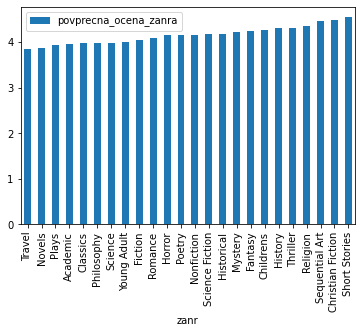

In [55]:
stevilo_knjig_po_zanru.plot.bar()

### 9. Kateri žanr je največkrat ocenjen?

In [62]:
stevilo_ocen_zanra = knjige.groupby('zanr').sum().stevilo_ocen.sort_values().to_frame('stevilo')
stevilo_ocen_zanra

,stevilo
zanr,
Short Stories,4869
Travel,13377
Religion,61188
Science,108586
Thriller,120835
...,...
Nonfiction,12566845
Young Adult,57154436
Fiction,59825276


Največkrat so bile ocenjene klasične knjige, nato fantazijske in fikcija, najmanj pa kratke zgodbe.

### 10. Kateri žanr ima povprečno najdaljše knjige?

In [63]:
povp_stevilo_strani_po_zanru = knjige.groupby('zanr').mean().stevilo_strani.sort_values().to_frame('povprecno_stevilo_strani')
povp_stevilo_strani_po_zanru

,povprecno_stevilo_strani
zanr,
Childrens,77.928571
Plays,117.500000
Thriller,163.500000
Short Stories,170.000000
Academic,219.000000
...,...
Fantasy,574.940476
Religion,604.000000
Sequential Art,616.000000


Najdaljši so v povprečju romani, najkrajše pa knjige za otroke.

<AxesSubplot:xlabel='zanr'>

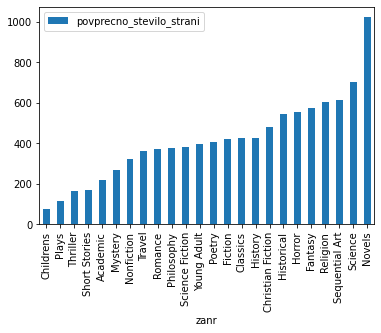

In [64]:
povp_stevilo_strani_po_zanru.plot.bar()